### Importação de Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregamento e Inspeção dos Dados

In [10]:
df_heart = pd.read_csv('data/heart.csv')

df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Link para o repositório no Kaggle - https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download&select=o2Saturation.csv

In [113]:
# Renomeando os nomes das colunas
df_heart.rename(columns={
    'age': 'idade',
    'sex': 'sexo',
    'cp': 'tipo_de_angina',
    'trtbps': 'pressao_arterial_em_repouso',
    'chol': 'colesterol',
    'fbs': 'acucar_jejum',
    'restecg': 'eletrocardiograma',
    'thalachh': 'freq_cardiaca_max',
    'exng': 'angina_exercicio',
    'oldpeak': 'depressao_ST',
    'slp': 'inclinação_ST',
    'caa': 'numero_de_grandes_vasos',
    'thall': 'talassemia'
}, inplace=True)

df_heart.head()

,idade,sexo,tipo_de angina,pressao_arterial_em_reposo,colesterol,acucar_no_sangue_em_jejum,eletrocardiograma,freq_cardiaca_max,angina_exercicio,depressao_ST,inclinação_ST,numero_de_grandes_vasos,talassemia,output
0,63,1,Dor não relacionada a angina,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,Angina atípica,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,Angina típica,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,Angina típica,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,Assintomático,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
print(f"O dataset possui {df_heart.shape[0]} linhas e {df_heart.shape[1]} colunas.")

O dataset possui 303 linhas e 14 colunas.


#### Descrição das colunas

**age (idade)**: Indica a idade do paciente em anos. É um fator importante, pois a idade pode aumentar o risco de problemas cardíacos.

**sex (sexo)**: Gênero do paciente, onde 1 representa masculino e 0 representa feminino.

**cp (tipo de angine ou de dor no peito)**: Classifica os diferentes tipos de dor no peito que o paciente pode sentir:
- 0: Assintomático (sem dor).
- 1: Angina típica (dor no peito causada por falta de fluxo sanguíneo adequado ao coração).
- 2: Angina atípica (dor que não se apresenta como a angina tradicional).
- 3: Dor não relacionada a angina (dor por outros motivos, não diretamente relacionados ao coração).

**trtbps (pressão arterial em repouso)**: Pressão arterial sistólica em repouso, medida em milímetros de mercúrio (mm Hg). A pressão arterial elevada pode ser um indicativo de risco para doenças cardíacas.

**chol (colesterol)**: Nível de colesterol total no sangue, medido em mg/dl. O colesterol elevado é um fator de risco significativo para doenças cardíacas.

**fbs (açúcar no sangue em jejum)**: Indica se o nível de açúcar no sangue em jejum é maior que 120 mg/dl, onde níveis altos de açúcar no sangue podem estar associados a diabetes, o que aumenta o risco de problemas cardíacos.. Valores:
- 1: Verdadeiro (nível de açúcar no sangue > 120 mg/dl).
- 0: Falso (nível de açúcar no sangue ≤ 120 mg/dl).

**restecg (eletrocardiograma em repouso)**: Resultados do eletrocardiograma (ECG) do paciente em repouso, categorizados como:
- 0: Normal.
- 1: Anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST).
- 2: Hipertrofia ventricular esquerda (espessamento da parede do ventrículo esquerdo). 

**thalachh (frequência cardíaca máxima atingida)**: Indica a frequência cardíaca máxima que o paciente atingiu durante o teste. Uma frequência cardíaca anormalmente alta ou baixa pode ser um indicador de risco cardíaco.

**exng (angina induzida por exercício)**: Indica se o paciente apresentou angina (dor no peito) durante exercícios físicos. Valores:
- 1: Sim (houve angina induzida pelo exercício).
- 0: Não (não houve angina durante o exercício). 

**oldpeak (depressão ST)**: Valor da depressão do segmento ST, medida em mm, durante o esforço físico em relação ao estado de repouso. Essa medida pode indicar isquemia miocárdica (falta de fluxo sanguíneo para o coração).

**slp (inclinação do segmento ST)**: Indica a inclinação do segmento ST durante o teste de esforço (inclinação descendente está mais associada a problemas cardíacos). Valores:
- 0: Inclinação descendente.
- 1: Plana.
- 2: Inclinação ascendente.

**caa (número de vasos principais)**: Refere-se ao número de grandes vasos sanguíneos principais (de 0 a 3) que estão visíveis em um exame de fluoroscopia. Um número maior de vasos com obstrução pode indicar um risco maior de ataque cardíaco.

**thall (talassemia)**: Indica os resultados de um exame de talassemia, que pode influenciar o risco cardíaco. Valores:
- 1: Defeito fixo (indica danos permanentes ao músculo cardíaco).
- 2: Normal.
- 3: Defeito reversível (indica isquemia, onde o músculo cardíaco está danificado, mas ainda pode ser salvo).

**output (resultado)**: Variável alvo (**target**), que indica se o paciente tem maior ou menor chance de sofrer um ataque cardíaco:
- 0: Menor chance.
- 1: Maior chance.

#### Informações gerais do dataset

In [23]:
df_heart.describe()

,idade,sexo,tipo_de angina,pressao_arterial_em_reposo,colesterol,acucar_no_sangue_em_jejum,eletrocardiograma,freq_cardiaca_max,angina_exercicio,depressao_ST,inclinação_ST,numero_de_grandes_vasos,talassemia,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Com base na saída da função `describe()` para o dataset, algumas conclusões iniciais podem ser feitas:

##### 1. Idade (`age`)
- A média de idade é de aproximadamente **54.36 anos**, com uma variação significativa (desvio padrão de **9.08 anos**), sugerindo que o conjunto de dados inclui pacientes de diferentes faixas etárias.
- A idade mínima é **29 anos** e a máxima é **77 anos**, cobrindo uma ampla gama de idades de adultos.

##### 2. Sexo (`sex`)
- A média para a coluna `sex` é de **0.68**, indicando que há mais pacientes do sexo masculino (1 representa masculino, 0 feminino) do que feminino.
- Isso sugere uma predominância de homens no dataset.

##### 3. Tipo de dor no peito (`cp`)
- A média é de **0.96**, e o valor máximo é **3**, o que corresponde aos diferentes tipos de dor no peito classificados de 1 a 3.
- A variabilidade aqui indica uma boa distribuição entre os diferentes tipos de dor no peito.

##### 4. Pressão arterial em repouso (`trtbps`)
- A média da pressão arterial sistólica em repouso é **131.62 mm Hg**, com um desvio padrão de **17.54 mm Hg**.
- O valor mínimo é **94 mm Hg** e o máximo é **200 mm Hg**, indicando uma variação considerável entre os pacientes. Isso pode ser um fator de risco significativo para doenças cardíacas.

##### 5. Colesterol (`chol`)
- A média dos níveis de colesterol é **246.26 mg/dl**, com um desvio padrão de **51.83 mg/dl**.
- O valor máximo é **564 mg/dl**, o que sugere que alguns pacientes podem ter níveis de colesterol extremamente altos, aumentando o risco de problemas cardíacos.

##### 6. Frequência cardíaca máxima atingida (`thalachh`)
- A frequência cardíaca máxima média é de **149.65 batimentos por minuto**, com um desvio padrão de **22.90**.
- O valor máximo de **202** indica que alguns pacientes atingem frequências cardíacas muito altas durante o exercício, o que pode ser um fator de risco.

##### 7. Angina induzida por exercício (`exng`)
- A média de **0.32** sugere que cerca de 32% dos pacientes apresentaram angina induzida por exercício, o que é um fator de risco importante.

##### 8. Número de grandes vasos (`caa`)
- A média de **0.72** e o valor máximo de **4** sugerem uma variação significativa na quantidade de grandes vasos obstruídos ou visíveis, com a maioria dos pacientes tendo entre 0 e 3 vasos afetados.

##### 9. Alvo (`output`)
- A coluna `output` tem uma média de **0.54**, o que indica que o conjunto de dados está bem balanceado entre pacientes com maior e menor risco de ataque cardíaco.

Os dados indicam uma distribuição variada entre diferentes grupos de pacientes, tanto em termos de idade, sexo, como em fatores clínicos, como pressão arterial, colesterol e frequência cardíaca. A maioria dos pacientes é masculina, de meia-idade, com variações significativas em fatores de risco relacionados ao coração, como níveis de colesterol e angina induzida por exercício. Isso sugere que o conjunto de dados contém informações relevantes para a análise de risco cardíaco. 


#### Váriáveis Quantitativas e Qualitativas

In [24]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   idade                       303 non-null    int64  
 1   sexo                        303 non-null    int64  
 2   tipo_de angina              303 non-null    int64  
 3   pressao_arterial_em_reposo  303 non-null    int64  
 4   colesterol                  303 non-null    int64  
 5   acucar_no_sangue_em_jejum   303 non-null    int64  
 6   eletrocardiograma           303 non-null    int64  
 7   freq_cardiaca_max           303 non-null    int64  
 8   angina_exercicio            303 non-null    int64  
 9   depressao_ST                303 non-null    float64
 10  inclinação_ST               303 non-null    int64  
 11  numero_de_grandes_vasos     303 non-null    int64  
 12  talassemia                  303 non-null    int64  
 13  output                      303 non

In [26]:
unique_vals=[]

for c in df_heart.columns:
    vals_cnt=df_heart[c].value_counts().count()
    unique_vals.append(vals_cnt)

pd.DataFrame(unique_vals,index=df_heart.columns,columns=['Total unique values'])

,Total unique values
idade,41
sexo,2
tipo_de angina,4
pressao_arterial_em_reposo,49
colesterol,152
acucar_no_sangue_em_jejum,2
eletrocardiograma,3
freq_cardiaca_max,91
angina_exercicio,2
depressao_ST,40


##### Resumo
- **Variáveis Quantitativas** (Numéricas): age, trtbps, chol, thalachh, oldpeak, caa.
- **Variáveis Qualitativas** (Categóricas): sex, cp, exng, fbs, rest_ecg, thal, output.


#### Limpeza dos Dados

- Abaixo, podemos observar que não há dados nulos ou faltantes dentro do dataset.

In [25]:
df_heart.isnull().sum()

idade                         0
sexo                          0
tipo_de angina                0
pressao_arterial_em_reposo    0
colesterol                    0
acucar_no_sangue_em_jejum     0
eletrocardiograma             0
freq_cardiaca_max             0
angina_exercicio              0
depressao_ST                  0
inclinação_ST                 0
numero_de_grandes_vasos       0
talassemia                    0
output                        0
dtype: int64

In [27]:
#verificando dados duplicados
df_heart[df_heart.duplicated()]

,idade,sexo,tipo_de angina,pressao_arterial_em_reposo,colesterol,acucar_no_sangue_em_jejum,eletrocardiograma,freq_cardiaca_max,angina_exercicio,depressao_ST,inclinação_ST,numero_de_grandes_vasos,talassemia,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [28]:
#removendo dado duplicado
df_heart.drop_duplicates(inplace=True)

## Perguntas que iremos direcionar a análise exploratória

- Qual a distribuição das idades dos pacientes? Existe alguma faixa etária predominante? <br></br>
- Qual a proporção de homens e mulheres no dataset? <br></br>
- Há uma diferença significativa na ocorrência de ataques cardíacos entre os gêneros? Qual gêneros apresenta maior risco? <br></br>
- Existe alguma diferença significativa nas variáveis numéricas entre os sexos (e.g., pressão arterial, colesterol)? <br></br>
- Qual o tipo de dor no peito mais comum? <br></br>
- Há relação entre o tipo de dor e a idade, sexo ou outros fatores? <br></br>
- Existe alguma associação entre o resultado do ECG e a presença de doença cardíaca? <br></br>
- Existe uma relação entre os níveis de açúcar no sangue em jejum (fbs) e a probabilidade de um ataque cardíaco? <br></br>
- Como a frequência cardíaca máxima (thalachh) está relacionada com o risco de ataques cardíacos? Frequências mais altas indicam um maior risco? <br></br>

##### **Analisando cada variável numérica ('pressao_arterial_em_reposo', 'colesterol', 'freq_cardiaca_max', 'depressao_ST', 'numero_de_grandes_vasos)**

<Figure size 1200x1000 with 0 Axes>

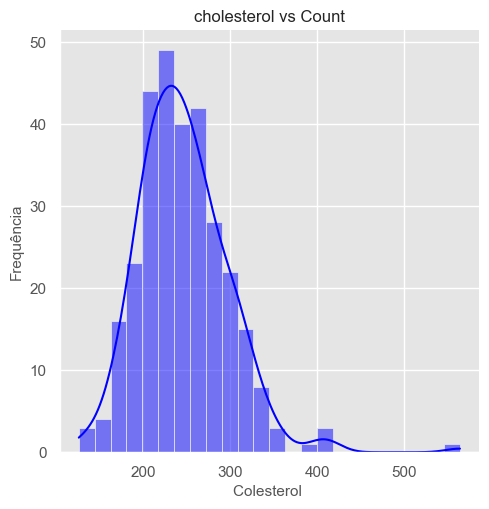

In [109]:
# Colesterol
plt.figure(figsize=(12,10))
sns.displot(df_heart['colesterol'], kde=True, color='blue')
plt.xlabel('Colesterol ',fontsize=11)
plt.ylabel('Frequência',fontsize=11)
plt.title('Colesterol',fontsize=12)
plt.show()


<Figure size 1200x1000 with 0 Axes>

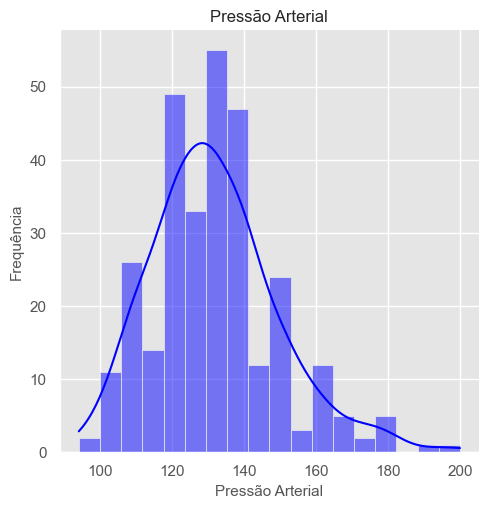

In [114]:
# Pressão Arterial 
plt.figure(figsize=(12,10))
sns.displot(df_heart['pressao_arterial_em_reposo'], kde=True, color='blue')
plt.xlabel('Pressão Arterial',fontsize=11)
plt.ylabel('Frequência',fontsize=11)
plt.title('Pressão Arterial',fontsize=12)
plt.show()

<Figure size 1200x1000 with 0 Axes>

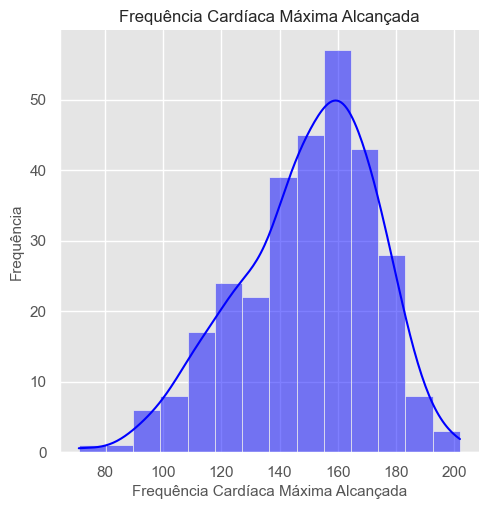

In [111]:
# Frequência Cardiaca 
plt.figure(figsize=(12,10))
sns.displot(df_heart['freq_cardiaca_max'], kde=True, color='blue')
plt.xlabel('Frequência Cardíaca Máxima Alcançada',fontsize=11)
plt.ylabel('Frequência',fontsize=11)
plt.title('Frequência Cardíaca Máxima Alcançada',fontsize=12)
plt.show()

<Figure size 1200x1000 with 0 Axes>

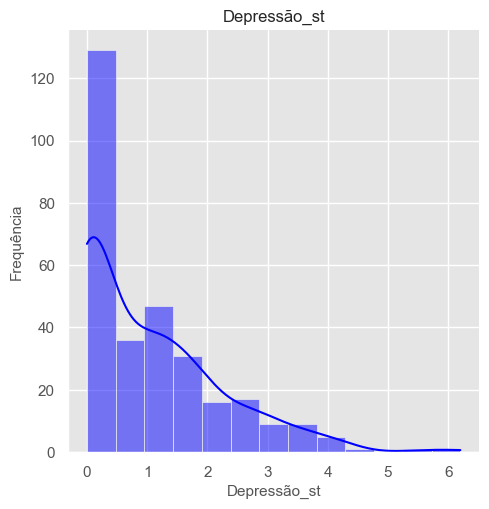

In [117]:
# Depressão_st
plt.figure(figsize=(12,10))
sns.displot(df_heart['depressao_ST'], kde=True, color='blue')
plt.xlabel('Depressão_st',fontsize=11)
plt.ylabel('Frequência',fontsize=11)
plt.title('Depressão_st',fontsize=12)
plt.show()

##### **Qual a distribuição das idades dos pacientes? Existe alguma faixa etária predominante?**

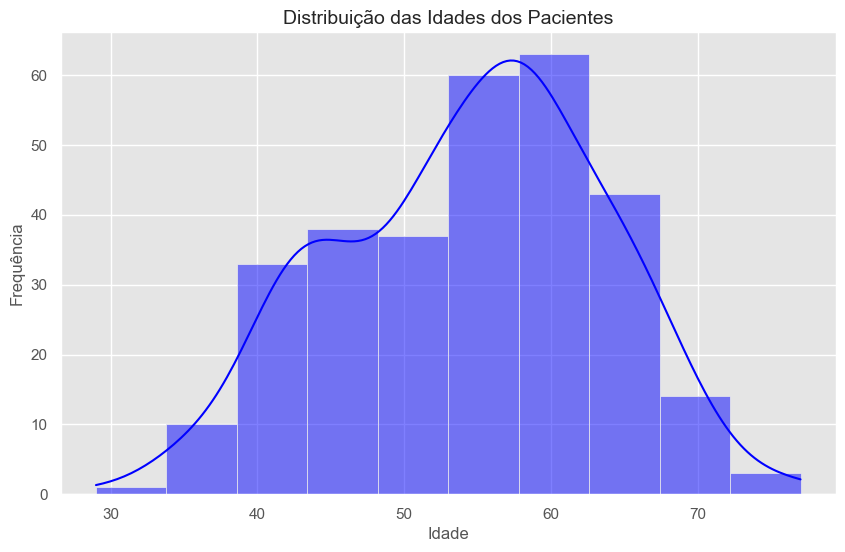

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df_heart['idade'], bins=10, kde=True, color='blue')
plt.title('Distribuição das Idades dos Pacientes', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

##### **Qual a proporção de homens e mulheres no dataset?** 

In [31]:
count_sexo = df_heart['sexo'].value_counts()
count_sexo


sexo
1    206
0     96
Name: count, dtype: int64

In [39]:
rotulos = ['Homem', 'Mulher']

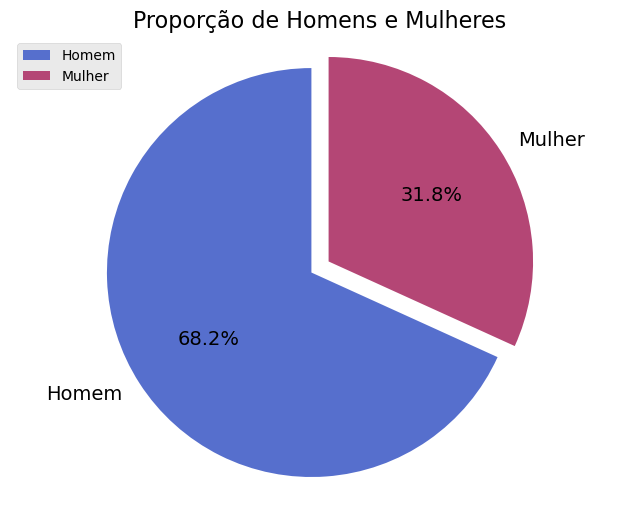

In [44]:
plt.figure(figsize=(8, 6))
plt.pie(count_sexo,
        labels=rotulos,
        autopct='%1.1f%%',
        colors=['#566fcd', '#b44675'],
        explode=[0.1, 0],
        startangle=90,
        textprops={'fontsize': 14})
plt.title('Proporção de Homens e Mulheres', fontsize=16)
plt.legend(loc='upper left')
plt.axis('equal')
plt.style.use('ggplot')
plt.show()

##### **Há uma diferença significativa na ocorrência de ataques cardíacos entre os genêros? Qual gênero apresenta maior risco?**

In [45]:
agrupamento_por_genero = df_heart.groupby('sexo')['output'].mean()

agrupamento_por_genero

sexo
0    0.750000
1    0.446602
Name: output, dtype: float64

/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_72338/2258460279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agrupamento_por_genero.index, y=agrupamento_por_genero.values, palette=['#b44675', '#566fcd'])


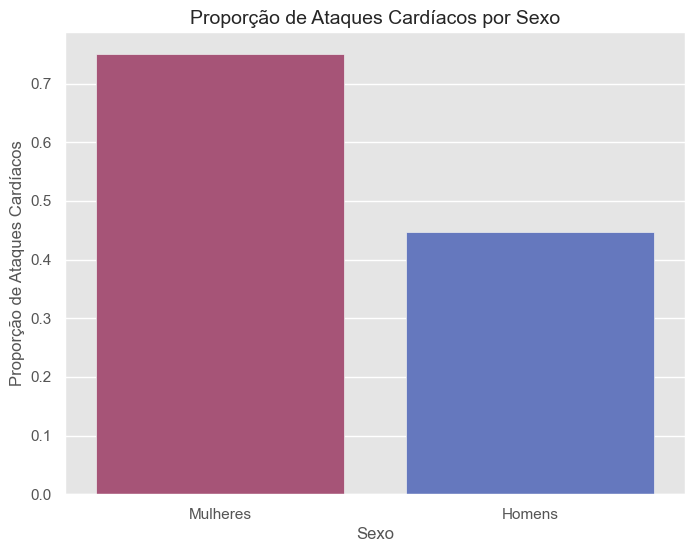

In [93]:
plt.figure(figsize=(8, 6))
sns.barplot(x=agrupamento_por_genero.index, y=agrupamento_por_genero.values, palette=['#b44675', '#566fcd'])
plt.title('Proporção de Ataques Cardíacos por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.xticks(ticks=range(len(agrupamento_por_genero.index)), labels={'Mulheres':0, 'Homens':1})
plt.ylabel('Proporção de Ataques Cardíacos', fontsize=12)
plt.style.use('ggplot')
plt.show()

##### **Existe alguma diferença significativa nas variáveis numéricas entre os sexos (e.g., pressão arterial, colesterol)?**

In [70]:
numerical_vars = ['pressao_arterial_em_reposo', 'colesterol', 'freq_cardiaca_max', 'depressao_ST']

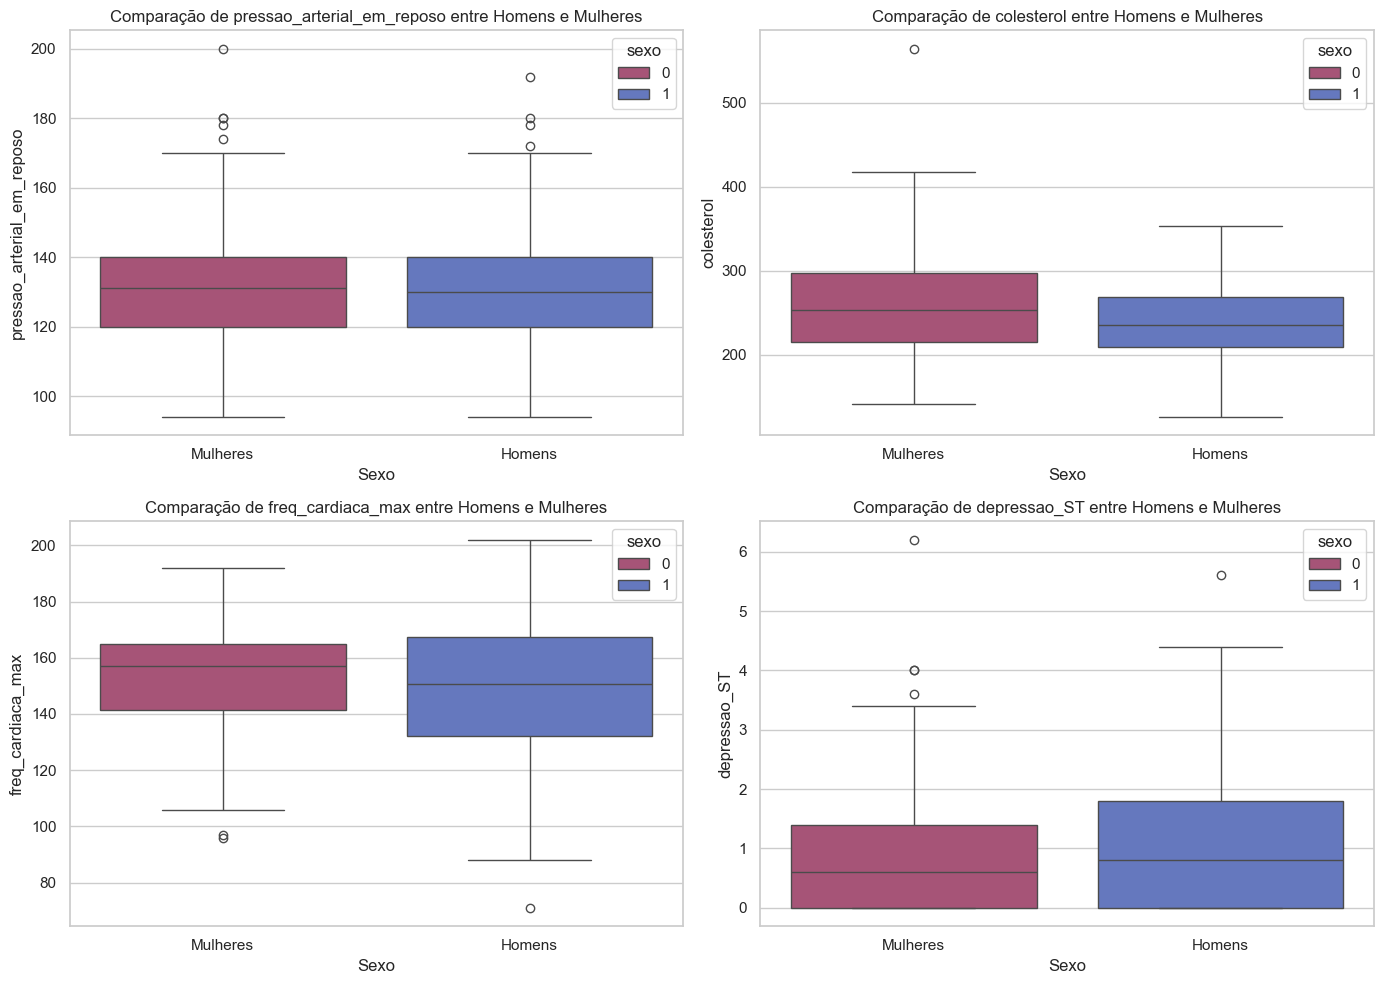

In [74]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='sexo', y=var, data=df_heart, palette={0: '#b44675', 1: '#566fcd'}, hue='sexo')
    plt.title(f'Comparação de {var} entre Homens e Mulheres')
    plt.xlabel('Sexo')
    plt.ylabel(var)

    plt.xticks(ticks=[0, 1], labels=['Mulheres', 'Homens'])

plt.tight_layout()
plt.show()

**Principais pontos observados em cada gráfico:**

**Comparação de Pressão Arterial em Repouso:**
- Mulheres (representadas pela caixa rosa) apresentam uma mediana de pressão arterial em repouso levemente superior à dos homens (representados pela caixa azul).
- Os homens têm uma maior variabilidade nos dados, indicada pelas extremidades da caixa e os pontos fora da caixa, que podem ser outliers.

**Comparação de Colesterol:**
- O nível de colesterol também parece ser mais elevado nas mulheres, com uma mediana que está ligeiramente acima da dos homens.

**Comparação de Frequência Cardíaca Máxima:**
- Neste gráfico, a mediana da frequência cardíaca máxima para homens é significativamente maior do que a das mulheres, indicando que, em média, os homens tendem a ter uma frequência cardíaca máxima mais alta.
- A variação é bastante semelhante entre os dois grupos.

**Comparação de Depressão ST:**
- As mulheres apresentam uma mediana de depressão ST que é superior à dos homens, indicando que elas têm, em média, um nível mais elevado de depressão ST.

##### **Qual o tipo de dor no peito mais comum?**


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_72338/3451626595.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_dor_counts.index, y=tipo_dor_counts.values, palette='rocket')


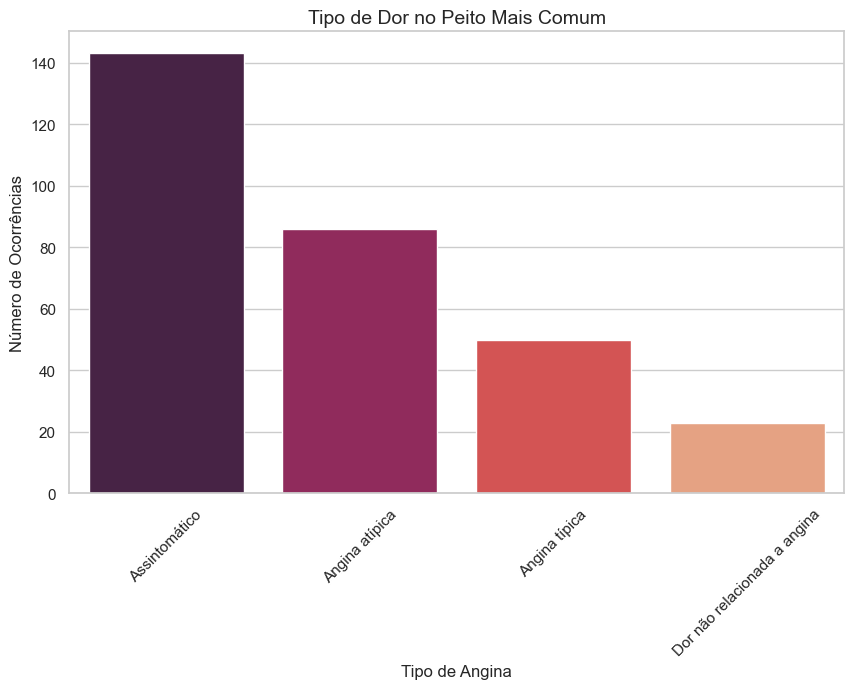

In [82]:
tipo_angina_map = {
    0: 'Assintomático',
    1: 'Angina típica',
    2: 'Angina atípica',
    3: 'Dor não relacionada a angina'
}

df_heart['tipo_de angina'] = df_heart['tipo_de angina'].replace(tipo_angina_map)

tipo_dor_counts = df_heart['tipo_de angina'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=tipo_dor_counts.index, y=tipo_dor_counts.values, palette='rocket')
plt.title('Tipo de Dor no Peito Mais Comum', fontsize=14)
plt.xlabel('Tipo de Angina', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45) 
plt.show()

##### **Há relação entre o tipo de dor e a idade, sexo ou outros fatores?** 


/var/folders/jv/x960ph5j46g4834_92nzcq900000gp/T/ipykernel_72338/2768569943.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tipo_de angina', y='idade', data=df_heart, palette='hls')


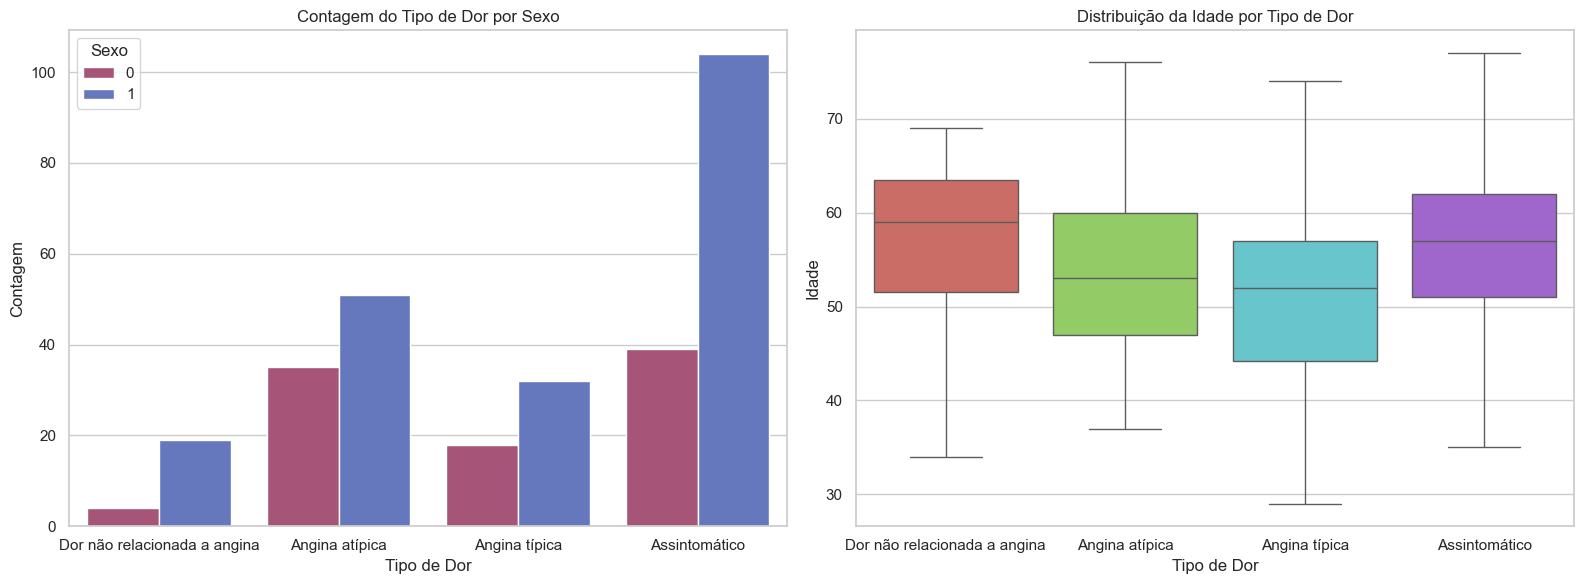

In [87]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 6))

# Gráfico de barras para o tipo de dor em relação ao sexo
plt.subplot(1, 2, 1)
sns.countplot(x='tipo_de angina', hue='sexo', data=df_heart, palette={0: '#b44675', 1: '#566fcd'})
plt.title('Contagem do Tipo de Dor por Sexo')
plt.xlabel('Tipo de Dor')
plt.ylabel('Contagem')
plt.legend(title='Sexo')

# Boxplot para a idade em relação ao tipo de dor
plt.subplot(1, 2, 2)
sns.boxplot(x='tipo_de angina', y='idade', data=df_heart, palette='hls')
plt.title('Distribuição da Idade por Tipo de Dor')
plt.xlabel('Tipo de Dor')
plt.ylabel('Idade')

# Ajustando o layout dos gráficos
plt.tight_layout()

# Exibindo os gráficos
plt.show()

##### **Existe alguma associação entre o resultado do ECG e a presença de doença cardíaca?**

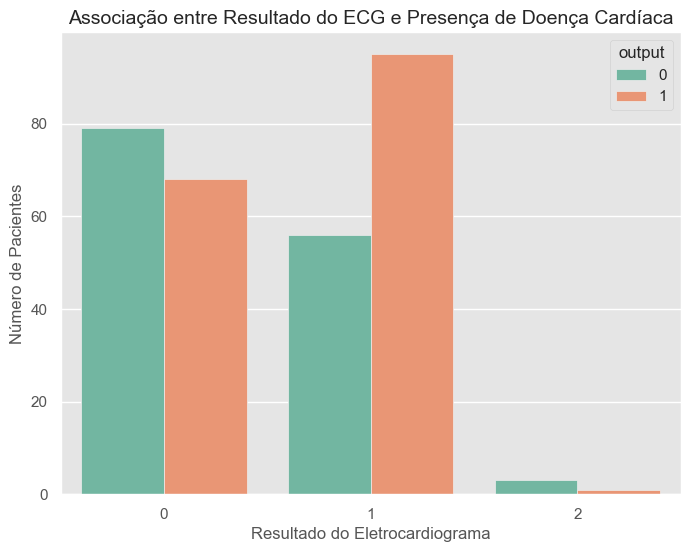

In [118]:
plt.figure(figsize=(8, 6))
sns.countplot(x='eletrocardiograma', hue='output', data=df_heart, palette='Set2')
plt.title('Associação entre Resultado do ECG e Presença de Doença Cardíaca', fontsize=14)
plt.xlabel('Resultado do Eletrocardiograma', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.show()

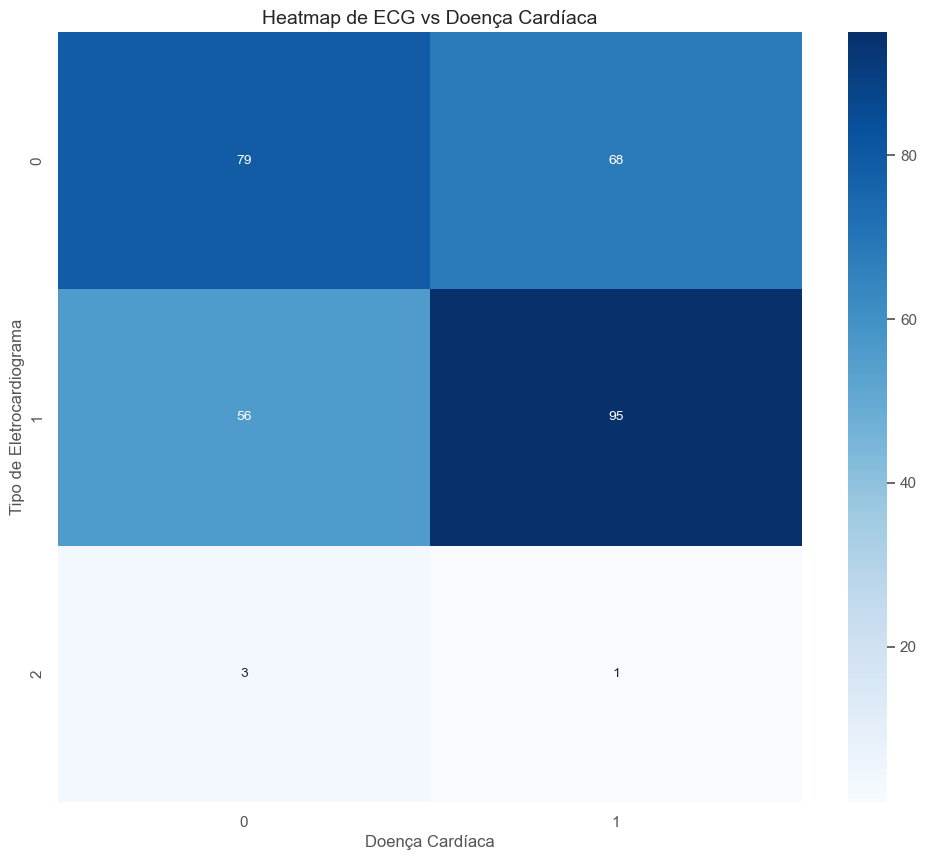

In [130]:
crosstab = pd.crosstab(df_heart['eletrocardiograma'], df_heart['output'])

plt.figure(figsize=(12, 10))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap de ECG vs Doença Cardíaca', fontsize=14)
plt.xlabel('Doença Cardíaca', fontsize=12)
plt.ylabel('Tipo de Eletrocardiograma', fontsize=12)
plt.show()

**Interpretação dos dados:**

**Tipo de ECG 0 (Normal):**
- 79 pacientes com ECG normal não têm doença cardíaca.
- 68 pacientes com ECG normal têm doença cardíaca. Isso sugere que um ECG normal não é necessariamente um indicador de ausência de doença cardíaca, pois a distribuição está bastante equilibrada.

**Tipo de ECG 1 (Anormalidade da onda ST-T):**
- 56 pacientes com essa anormalidade não têm doença cardíaca.
- 95 pacientes com essa anormalidade têm doença cardíaca. Aqui vemos uma maior associação entre essa anormalidade no ECG e a presença de doença cardíaca, pois há mais pacientes com essa anormalidade que têm a doença.

**Tipo de ECG 2 (Hipertrofia ventricular esquerda):**
- 3 pacientes com hipertrofia ventricular esquerda não têm doença cardíaca.
- Apenas 1 paciente com essa condição tem doença cardíaca. Neste caso, parece haver um número pequeno de pacientes com esse tipo de ECG, o que dificulta conclusões mais robustas sobre a relação entre esse tipo de ECG e a doença cardíaca.

##### **Existe uma relação entre os níveis de açúcar no sangue em jejum e a probabilidade de um ataque cardíaco?**

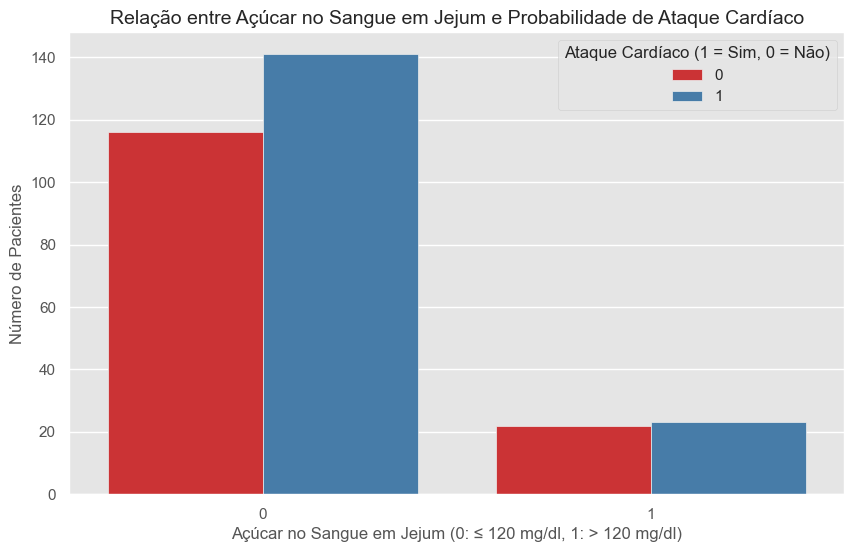

In [135]:
plt.figure(figsize=(10, 6))
sns.countplot(x='acucar_no_sangue_em_jejum', hue='output', data=df_heart, palette='Set1')
plt.title('Relação entre Açúcar no Sangue em Jejum e Probabilidade de Ataque Cardíaco', fontsize=14)
plt.xlabel('Açúcar no Sangue em Jejum (0: ≤ 120 mg/dl, 1: > 120 mg/dl)', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
plt.legend(title='Ataque Cardíaco (1 = Sim, 0 = Não)')
plt.show()

O gráfico sugere que a maioria dos pacientes com níveis normais de açúcar no sangue (≤ 120 mg/dl) não teve ataque cardíaco, enquanto aqueles com níveis elevados (> 120 mg/dl) apresentam uma chance semelhante de ter ou não ataque cardíaco.

##### **Como a frequência cardíaca máxima está relacionada com o risco de ataques cardíacos? Frequências mais altas indicam um maior risco?**

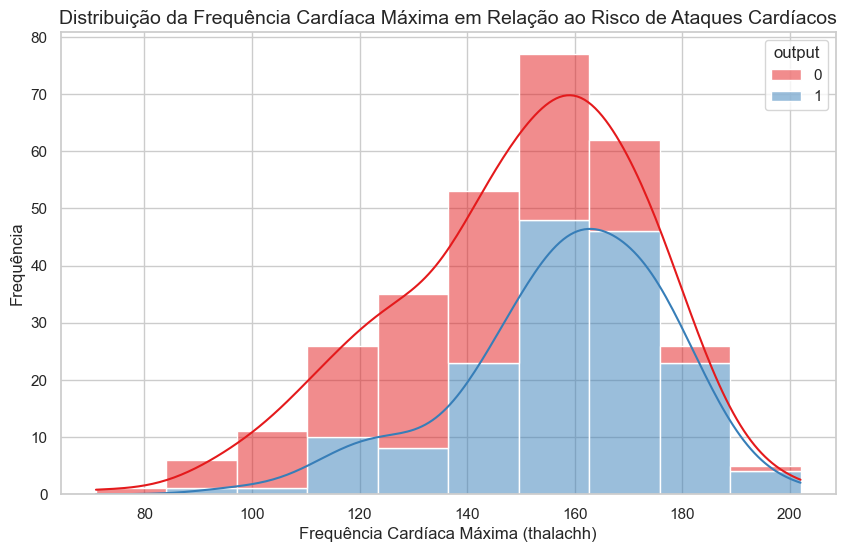

In [140]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df_heart, x='freq_cardiaca_max', hue='output', multiple='stack', bins=10, kde=True, palette='Set1')
plt.title('Distribuição da Frequência Cardíaca Máxima em Relação ao Risco de Ataques Cardíacos', fontsize=14)
plt.xlabel('Frequência Cardíaca Máxima (thalachh)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()